<a href="https://colab.research.google.com/github/eugebernas/Proyecto/blob/main/Copia_de_Grupo_27_Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

**Entregable 1 - Parte 1**

**Grupo 27:**

**Guillermo Alonso**

**María Eugenia Bernaschini**

**Juan Cruz Bordón**

**Javier Carabajal**



---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
print(len(df))
df[:3]

6095


,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * **Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.**
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

## Resolución del Ejercicio 1

A continuación se calculan las cantidades de valores perdidos de las variables salario neto y salario bruto:

In [ ]:
df.salary_monthly_NETO.isnull().sum() #cantidad de valores perdidos para salario neto

212

In [ ]:
df.salary_monthly_BRUTO.isnull().sum() #cantidad de valores perdidos para salario bruto

0

Dado que la variable salario neto posee mayor cantidad de valores perdidos que la variable salario bruto, decidimos considerar para nuestro análisis del salario de los programadores el salario bruto. 

Con respecto a la pregunta inicial ¿Cuáles son los lenguajes de programación asociados a los mejores salarios? creemos conveniente reformularla a:

 **¿Cuales son los lenguajes de programación asociados a los mejores salarios en posiciones junior (3 años o menos de experiencia)?** 

Esta elección se debe a que creemos que la información de los lenguajes de programación asociados a los mejores salarios es más relevante para las personas que quieren iniciarse en la programación como programadores junior. Además, los programadores de mayor experiencia cobran un porcentaje de su sueldo por antigüedad, lo que podría confundir el análisis si los consideramos como parte de nuestra muestra. 

In [ ]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO','profile_years_experience']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,profile_years_experience,cured_programming_languages
0,ninguno,Ninguno,53000.0,3.0,[ninguno]
1,html,"HTML, Javascript, Python",79000.0,5.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",79000.0,5.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",79000.0,5.0,"[html, javascript, python]"
2,ninguno,Ninguno,160000.0,2.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:25]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


In [ ]:
unicos=df_lang['programming_language'].unique() #cantidad de lenguajes de programación
len(unicos)

205

### Filtrado de años de experiencia

A continuación creamos una nueva base de datos (df_junior) considerando sólo aquellos programadores que poseen 3 o menos años de experiencia.

In [ ]:
df_junior = df_lang[df_lang['profile_years_experience']<=3]

Cálculo de las frecuencias de los lenguajes de programación para df_junior:

In [ ]:
language_count = df_junior.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:20]

,language,frequency
0,javascript,814
1,sql,592
2,html,576
3,css,427
4,java,380
5,python,360
6,typescript,239
7,.net,224
8,c#,208
9,bash/shell,191


Mayor a 50 tomamos nosotros. Laura profe nos dice que tomó el 5% de la muestra.

In [ ]:
unicos=df_junior['programming_language'].unique() #cantidad de lenguajes de programación
len(unicos)

92

In [ ]:
#Filtrado de años de experiencia para df generando la nueva basa df_j
df_j = df[df['profile_years_experience']<=3]
print(len(df_j))
print(len(df_j)/len(df))

1640
0.2690730106644791


Notar que al seleccionar la subpoblación de programadores juniors la muestra se reduce al 27%. Sin embargo la distribución de los lenguajes de programación de la submuestra es similar al de la muestra total, por lo que no estaríamos perdiendo información.  

### Filtrado de lenguajes de programación relevantes

Para el análisis de los datos seleccionamos aquellos lenguajes de programación que poseen una frecuencia mayor o igual a 50, ya que consideramos que a partir de esa cantidad la muestra es representativa.


In [ ]:
# Selección de los lenguajes de programación con frecuencia mayor o igual a 50
df_junior = df_junior.loc[df_junior['programming_language'].isin(['javascript','sql','html', 'python','java','css','bash/shell','php','.net','typescript','c#','go','c++','ruby'])]

### Selección del rango a analizar para salario bruto

In [ ]:
#medidas resumen para salario bruto de la base df_j
df_j['salary_monthly_BRUTO'].describe().apply(lambda s: '{0:.2f}'.format(s)) 

count      1640.00
mean      70822.41
std       48566.47
min           1.00
25%       44112.50
50%       60432.50
75%       86017.00
max      585000.00
Name: salary_monthly_BRUTO, dtype: object

In [ ]:
# Quitamos los salarios menores o iguales a 1000
df_j = df_j[df_j['salary_monthly_BRUTO']>1000] 
len(df_j)

1583

In [ ]:
#calculo de diferentes percentiles para df_j salario bruto
df_j['salary_monthly_BRUTO'].quantile([0.002,0.2,.01, .02,.95, .98, .99, .995, .998])

0.002      1832.8
0.200     42962.5
0.010     12000.0
0.020     20000.0
0.950    150000.0
0.980    196800.0
0.990    251800.0
0.995    340000.0
0.998    409196.0
Name: salary_monthly_BRUTO, dtype: float64

Consideramos que los salarios brutos que superan al percentil 99.8 son valores atípicos, ya que en el año 2020 un salario bruto para un programador junior superior a ese valor es muy poco frecuente. Idem para los salarios menores al percentil 0.2.

In [ ]:
#Eliminamos de la base de datos df_junior los valores atípicos para salario bruto
p=df_j['salary_monthly_BRUTO'].quantile(0.998) # cuantil 0.998
a=df_j['salary_monthly_BRUTO'].quantile(0.002) # cuantil 0.002
print(len(df_junior))
df_junior = df_junior[df_junior['salary_monthly_BRUTO']<p]
df_junior = df_junior[df_junior['salary_monthly_BRUTO']>a]
print(len(df_junior))

4356
4197


In [ ]:
#Eliminamos de la base de datos df_j los valores atípicos para salario bruto
df_j = df_j[df_j['salary_monthly_BRUTO']<p]
df_j = df_j[df_j['salary_monthly_BRUTO']>a]

In [ ]:
df_junior[:10]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,profile_years_experience,cured_programming_languages
5,java,"Java, Javascript",54000.0,1.0,"[java, javascript]"
5,javascript,"Java, Javascript",54000.0,1.0,"[java, javascript]"
6,javascript,Javascript,75000.0,1.0,[javascript]
7,java,"Java, Javascript",45000.0,0.0,"[java, javascript]"
7,javascript,"Java, Javascript",45000.0,0.0,"[java, javascript]"
10,html,"HTML, Javascript, Python",36800.0,1.0,"[html, javascript, python]"
10,javascript,"HTML, Javascript, Python",36800.0,1.0,"[html, javascript, python]"
10,python,"HTML, Javascript, Python",36800.0,1.0,"[html, javascript, python]"
17,html,"HTML, Java, Javascript",88000.0,3.0,"[html, java, javascript]"
17,java,"HTML, Java, Javascript",88000.0,3.0,"[html, java, javascript]"


In [ ]:
 print(len(df_junior.index.unique())) # cantidad de personas en la muestra final
 print(len(df_junior.index.unique())/len(df)) # porcentaje de personas en la muestra final del total de la base


1372
0.2251025430680886


La muestra final a analizar (luego de realizar todos los filtros) contiene 1372 personas, que corresponde al 23% de la muestra inicial.

### Comparación de medidas de estadística descriptiva sobre la distribución de salario bruto para cada lenguaje seleccionado

In [ ]:
# Medidas resumen de salario bruto para cada lenguaje
df_des = df_junior.groupby('programming_language')
df_des['salary_monthly_BRUTO'].describe()

,count,mean,std,min,25%,50%,75%,max
programming_language,,,,,,,,
.net,218.0,69275.334679,37918.261247,16000.00,45045.00,60229.0,85000.0,400000.0
bash/shell,189.0,88246.918889,54186.950561,21100.00,53000.00,73000.0,106478.0,340000.0
c#,202.0,68350.871386,38808.351018,7000.00,45000.00,60000.0,85000.0,400000.0
c++,54.0,71737.078704,61675.950106,7000.00,42000.00,59968.5,81740.0,380000.0
css,412.0,70291.747888,43620.110421,2000.00,44000.00,60432.5,85625.0,400000.0
go,60.0,100882.263833,42950.009800,2000.00,71550.00,98322.5,125500.0,203000.0
html,553.0,69507.244105,41650.750431,2000.00,44000.00,60000.0,85000.0,400000.0
java,368.0,73679.868995,38616.144949,8500.00,47000.00,65000.0,90000.0,260000.0
javascript,783.0,74164.919119,44099.459097,2000.00,45442.50,64000.0,90000.0,400000.0


In [ ]:
df_junior.head()

,programming_language,tools_programming_languages,salary_monthly_BRUTO,profile_years_experience,cured_programming_languages
5,java,"Java, Javascript",54000.0,1.0,"[java, javascript]"
5,javascript,"Java, Javascript",54000.0,1.0,"[java, javascript]"
6,javascript,Javascript,75000.0,1.0,[javascript]
7,java,"Java, Javascript",45000.0,0.0,"[java, javascript]"
7,javascript,"Java, Javascript",45000.0,0.0,"[java, javascript]"


In [ ]:
# Hacemos una lista de los lenguajes ordenados de mayor a menor mediana para luego ordenar el boxplot
sorted = df_junior.groupby(['programming_language']).median().salary_monthly_BRUTO.sort_values(ascending=False)
sorted_list = sorted.index.array

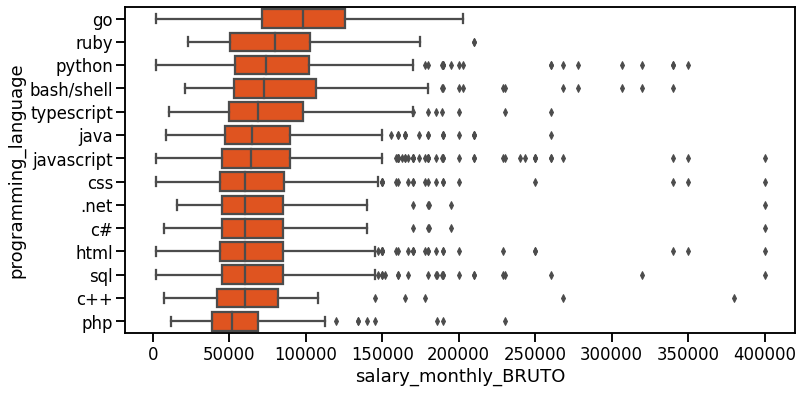

In [ ]:
# Boxplot de salario bruto para cada lenguaje
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_junior, x='salary_monthly_BRUTO', order = sorted_list, y='programming_language',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

De las medidas resumen y del boxplot se observa que Go, Ruby, Python y Bash/shell tienen una media y mediana superior al resto de los lenguajes. Lo mismo sucede con el primer y tercer cuartil. 

A continuación se comparan las medias de los programadores junior de Go respecto a todos los programadores junior.

In [ ]:
# Cálculo del salario bruto medio para la base df_j
a=df_j.salary_monthly_BRUTO.mean()
print(a)

72503.86082539683


In [ ]:
# Cálculo del salario bruto medio para los programadores junior de GO
b=df_junior[df_junior['programming_language']== 'go'].salary_monthly_BRUTO.mean()
print(b)
# Cálculo de la diferencia entre las medias de salario bruto para programadores junior de Go y programadores junior en general
print(b-a)
# Cálculo del porcentaje de la diferencia calculada anteriormente respecto de la media general
print((b-a)/a*100)

100882.26383333335
28378.40300793652
39.140540496563546


Por lo tanto, los programadores que usan Go ganan, en promedio, 39% más que la media de todos los progamadores junior. 

### Conclusión

A partir de los resultados de los análisis podemos concluir que los lenguajes de programación asociados a los mejores salarios de programadores con tres o menos años de experiencia son Python, Bash/shell, Go y Ruby. Siendo Go el que supera en gran medida al resto. 
Además, los programadores que usan Go ganan, en promedio, 39% más que la media de todos los progamadores junior.

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

Las herramientas útiles para explorar la base son, en primer lugar, las medidas de posición (media, mediana, percentiles) y las medidas de dispersión (varianza, desvío estándar, rango intercuartil). En segundo lugar, para conocer la distribución de los datos son muy útiles los histogramas (variables continuas) o gráficos de conteo (variables categóricas). A continuación se presenta un ejemplo para la variable Edad:


In [ ]:
# Medidas resumen para la variable continua Edad quitando los valores erróneoas (más de 100 años)
max_age = 99
df_edad = df[df.profile_age < max_age]
df_edad['profile_age'].describe()

count    6093.000000
mean       32.568029
std         7.248713
min        18.000000
25%        27.000000
50%        31.000000
75%        37.000000
max        67.000000
Name: profile_age, dtype: float64

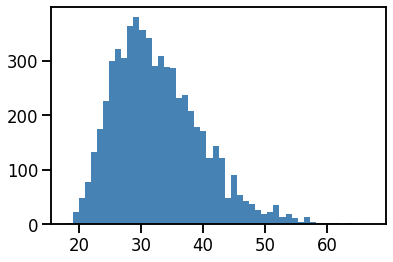

In [ ]:
# Histograma para la edad sin valores erróneos
plt.hist(df_edad['profile_age'], color='steelblue', bins=50)
plt.show()

Para la variable Edad podemos concluir que el promedio de los trabajadores tiene aproximadamente 32 años con un desvío estándar de 7 años y que la distribución de las edades es bastante simétrica desplazada levemente hacia la derecha. 

Para estudiar el comportamiento de dos o más variables conjuntas se pueden emplear las herramientas que se describen en los próximos ejercicios. 

Además, cabe destacar que se pueden implementar enfoques probabilísticos para estudiar asociaciones entre variables. 

## a) Densidad conjunta

**Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?** 

Para dos variables categóricas se pueden emplear tablas de contingencia, heatmaps y gráficos de barra (coloreadas). Para variables numéricas, pairplots y jointplots. Para analizar el comportamiento de una variable numérica respecto de una categórica se pueden utilizar histogramas coloreados (cada color corresponde a una categoría diferente), catplots y jointplots.

**Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa**




Elección de variables:

Variables numéricas: 

*   Salario bruto
*   Edad
*   Años de experiencia

Variables categóricas:

*   Género
*   Satisfacción al salario



A continuación se analizan las variables categóricas Género y Satisfacción al salario a través de tablas de contingencia y gráficos de barra coloreados.

In [ ]:
## Tabla de contingencia Género vs. Satisfacción al salario
pd.crosstab(df.profile_gender, df.salary_satisfaction)#, normalize=True)

salary_satisfaction,1,2,3,4
profile_gender,,,,
Hombre,526,1616,2245,735
Mujer,119,274,409,140
Otros,5,7,16,3


In [ ]:
## Tabla de contingencia Género vs. Satisfacción al salario normalizada
pd.crosstab(df.profile_gender, df.salary_satisfaction, normalize=True)

salary_satisfaction,1,2,3,4
profile_gender,,,,
Hombre,0.086300,0.265135,0.368335,0.120591
Mujer,0.019524,0.044955,0.067104,0.022970
Otros,0.000820,0.001148,0.002625,0.000492


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

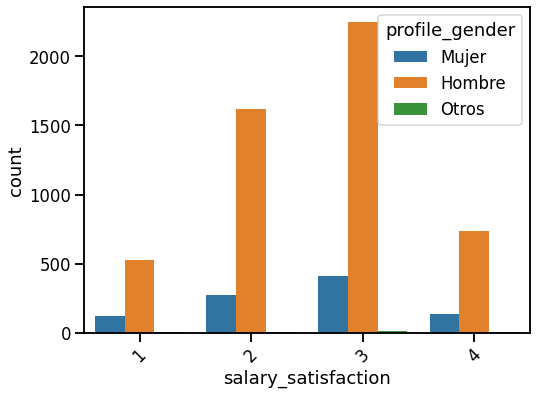

In [ ]:
# Gráfico de barra coloreado para las variables categóricas Género y Satisfacción al salario
fig = plt.figure(figsize=(8,6))
seaborn.countplot(df.salary_satisfaction,  hue=df.profile_gender )
plt.xticks(rotation=45)

Tanto en las tablas de contingencia como en el gráfico de barras se observa que la mayoría de los hombres (un 44%) se encuentra satisfecho en grado 3 respecto a su salario. Para mujeres sucede lo mismo, la mayoría (un 43%) se encuentra satisfecha en grado 3 respecto a su salario. La minoría de los hombres y la minoría de las mujeres se encuentran satisfechos en grado 1 respecto a su salario. 

Como conclusión de estos resultados podemos decir que, en general, los programadores se sienten bastante conformes con sus salarios. 

A continuación se analiza el par de variables numéricas Salario bruto y Edad. Para la variable Edad se eliminan los valores extremos.

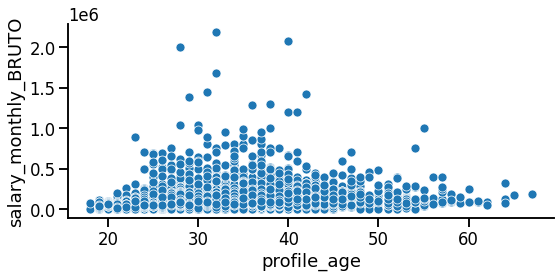

In [ ]:
# Pair plot Salario bruto vs. Edad
max_age = 99
seaborn.pairplot(data=df[df.profile_age < max_age], y_vars=['salary_monthly_BRUTO'],
                 x_vars=['profile_age'],
                 aspect=2, height=4)

Del gráfico se puede observar que el grupo etario de 25 años hasta 40 años, aproximadamente, posee los salarios brutos más altos. 

A continuación se analizan las variables Años de experiencia y Género. Para años de experiencia se eliminan los valores extremos o erróneos.

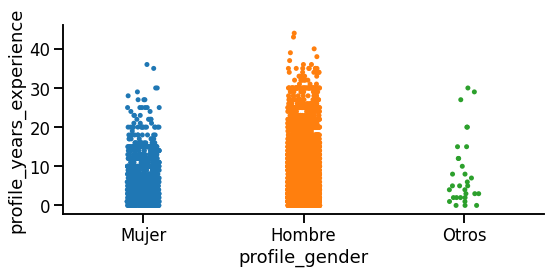

In [ ]:
# Catplot Años de experiencia vs Género
max_exp = 99
seaborn.catplot(data=df[df.profile_years_experience < max_exp], y='profile_years_experience',
                x='profile_gender', height=4, aspect=2)

A partir del catplot se concluye que, en general, hay pocos programadores con más de 30 años de experiencia y, en particular, hay muy pocas mujeres con más de 20 años de experiencia. 

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



Para saber si existe correlación entre en Salario Bruto y el Salario Neto comenzamos realizando un pairplot. Si se observa una tendencia, podemos sospechar que sí existe correlación. Luego, calculamos el coeficiente de correlación de Spearman (la distribución de salarios no es normal) para confirmar la correlación.

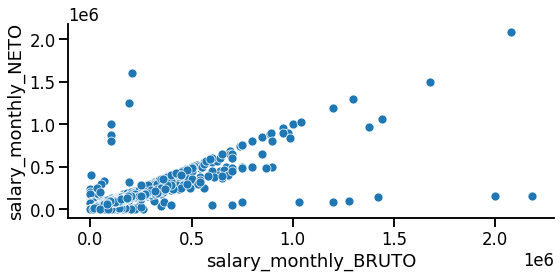

In [ ]:
seaborn.pairplot(data=df, y_vars=['salary_monthly_NETO'],
                 x_vars=['salary_monthly_BRUTO'],
                 aspect=2, height=4)

In [ ]:
# Correlación de spearman
print('Correlación spearman: ', df['salary_monthly_NETO'].corr(df['salary_monthly_BRUTO'], method='spearman'))

Correlación spearman:  0.9386955369657433


El coeficiente de correlación de Spearman es cercano a 1, lo que sugiere que existe una alta correlación lineal positiva entre el salario neto y el salario bruto. A partir de este análisis concluimos que es válido quitar alguna de las dos variables.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [ ]:
# Tabla de frecuencia para la variable nivel de estudio
df['profile_studies_level'].value_counts()

Universitario    4133
Terciario        1135
Secundario        449
Posgrado          342
Doctorado          30
Posdoctorado        4
Primario            2
Name: profile_studies_level, dtype: int64

A continuación agrupamos Primario, Secundario y Terciario en la nueva categoría **No universitario** y agrupamos Universitario, Posgrado, Doctorado y Posdoctorado en la nueva categoría **Universitario**.

In [ ]:
## Crear una nueva variable nivel de estudio agrupando niveles de una categoría
df['NE'] = df['profile_studies_level']
df['NE'] = df['NE'].astype('category')
df['NE'].value_counts()
df['NE'] = df['NE'].replace({'Primario':'No universitario','Secundario':'No universitario','Terciario':'No universitario','Posgrado':'Universitario','Doctorado':'Universitario','Posdoctorado':'Universitario'})
df['NE'].value_counts()

Universitario       4509
No universitario    1586
Name: NE, dtype: int64

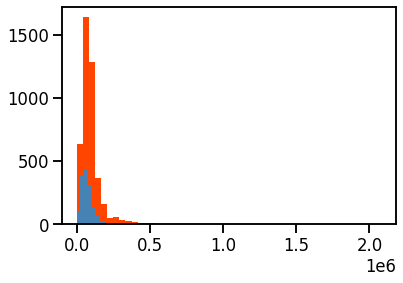

In [ ]:
# Histograma conjunto
df_NU= df[df['NE']=='No universitario']
df_U=df[df['NE']=='Universitario']

plt.hist(df_U['salary_monthly_NETO'], color='orangered', bins=50)
plt.hist(df_NU['salary_monthly_NETO'], color='steelblue', bins=50)

plt.show()

In [ ]:
# Medidas de centralización para cada subpoblación
df_by = df.groupby('NE')
df_by['salary_monthly_NETO'].describe()

,count,mean,std,min,25%,50%,75%,max
NE,,,,,,,,
No universitario,1542.0,81349.961395,77811.085563,1.0,45000.0,66900.0,93000.0,1250000.0
Universitario,4341.0,99723.986200,102359.774016,1.0,54000.0,80000.0,110000.0,2080000.0


La media, mediana y demás medidas de posición son superiores para el grupo de los Universitarios que para el grupo de los No universitarios. Con lo cual concluimos que ambas variables (salario neto y nivel de educación) no son independientes. A mayor nivel de estudio mayor salario neto.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


Elegimos las variables numéricas Salario bruto y Edad y la variable categórica Género. Para la variable Edad eliminamos valores erróneos.

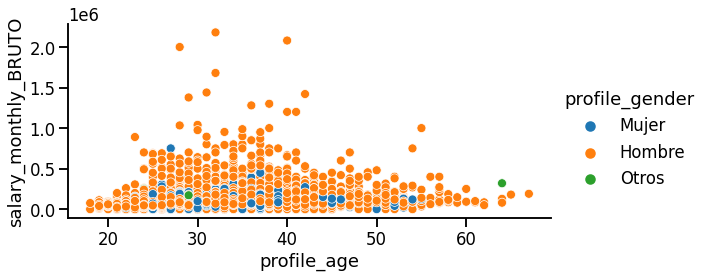

In [ ]:
# Gráfico de densidad conjunta condicional
max_age = 99
seaborn.pairplot(data=df[df.profile_age < max_age], x_vars=['profile_age'],
                 y_vars=['salary_monthly_BRUTO'],
                 aspect=2, height=4, hue='profile_gender')

A partir del gráfico podemos concluir que los mejores salarios corresponden a personas de entre 25 y 40 años. La tendencia es similar tanto para hombres como para mujeres.